# Lab Exercise: Feature Extraction and Dimensionality Reduction using Autoencoders in CNN and LSTM

**Objective**
- Understand the concept of autoencoders and their role in feature extraction and
dimensionality reduction.
- Implement and compare the use of Convolutional Neural Network (CNN)-based
and Long Short-Term Memory (LSTM)-based autoencoders.

## Imports and preprocessing

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest

##Part 1: CNN Autoencoder




**Task**
1. Build a CNN autoencoder to process image data (e.g., the MNIST or CIFAR-10
dataset):
- Use convolutional layers in the encoder to extract spatial features.
- Use transposed convolutional layers in the decoder to reconstruct the
images.
- Visualize the input and reconstructed images.
2. Evaluate the autoencoder’s ability to compress data:
- Measure the Mean Squared Error (MSE) between the original and
reconstructed images.
- Visualize the reduced feature space (latent space) using a 2D
visualization tool such as t-SNE or PCA.

In [ ]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, 3, activation="relu", padding="same")(encoder_inputs)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Conv2D(8, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Conv2D(8, 3, activation="relu", padding="same")(x)
encoder_outputs = layers.MaxPooling2D(2, padding="same")(x)

encoder = keras.Model(encoder_inputs, encoder_outputs, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584 

In [ ]:
decoder_inputs = keras.Input(shape=(4, 4, 8))
x = layers.Conv2D(8, 3, activation="relu", padding="same")(decoder_inputs)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(8, 3, activation="relu", padding="same")(x)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
x = layers.UpSampling2D(2)(x)
decoder_outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)

decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 4, 8)]         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 up_sampling2d (UpSampling2  (None, 8, 8, 8)           0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        1168

In [ ]:
autoencoder = keras.Sequential([encoder, decoder])
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data= (x_test, x_test))

Epoch 1/10
235/235 [==============================] - 13s 52ms/step - loss: 0.4059 - val_loss: 0.3221
Epoch 2/10
235/235 [==============================] - 12s 52ms/step - loss: 0.3140 - val_loss: 0.3109
Epoch 3/10
235/235 [==============================] - 12s 53ms/step - loss: 0.3060 - val_loss: 0.3051
Epoch 4/10
235/235 [==============================] - 12s 52ms/step - loss: 0.3019 - val_loss: 0.3021
Epoch 5/10
235/235 [==============================] - 12s 52ms/step - loss: 0.2993 - val_loss: 0.3003
Epoch 6/10
235/235 [==============================] - 13s 53ms/step - loss: 0.2974 - val_loss: 0.2984
Epoch 7/10
235/235 [==============================] - 13s 53ms/step - loss: 0.2961 - val_loss: 0.2974
Epoch 8/10
235/235 [==============================] - 13s 54ms/step - loss: 0.2949 - val_loss: 0.2972
Epoch 9/10
235/235 [==============================] - 13s 56ms/step - loss: 0.2940 - val_loss: 0.2954
Epoch 10/10
235/235 [==============================] - 13s 55ms/step - loss: 0.293

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 4ms/step


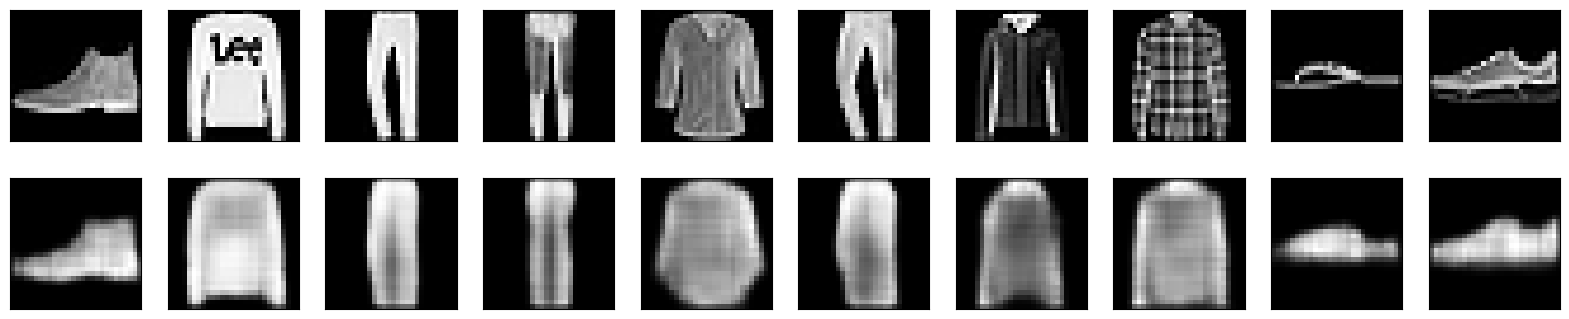

In [ ]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 1s 4ms/step


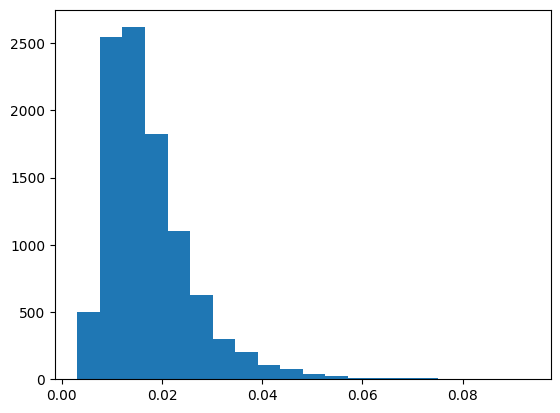

MSE:  0.017418042


In [ ]:
# Evaluate the autoencoder’s ability to compress data:
# Measure the Mean Squared Error (MSE) between the original and reconstructed images.

reconstructed_images = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - reconstructed_images, 2), axis=(1, 2))
plt.hist(mse, bins=20)
plt.show()

print("MSE: ", np.mean(mse))


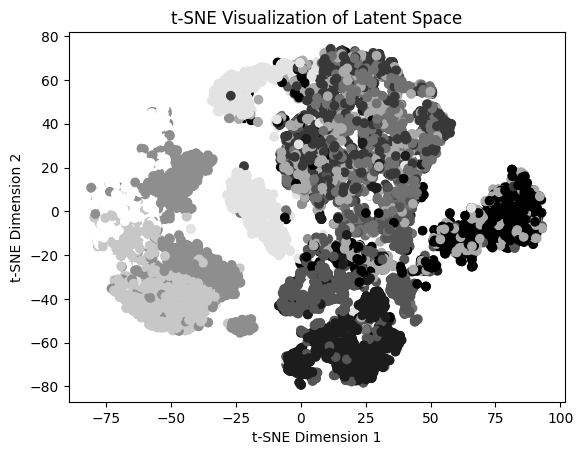

In [ ]:
tsne = TSNE(n_components=2)
encoded_tsne = tsne.fit_transform(encoded_imgs.reshape(encoded_imgs.shape[0], -1))

plt.scatter(encoded_tsne[:, 0], encoded_tsne[:, 1], c=y_test)
plt.title('t-SNE Visualization of Latent Space')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

**Key Questions:**



**How does the CNN autoencoder perform in reconstructing images?**
- We can evaluate the CNN autoencoder's performance by examining the reconstructed images visually and by calculating the Mean Squared Error (MSE) between the original and reconstructed images.
- A lower MSE indicates better reconstruction quality.

**What insights do you gain from visualizing the latent space?**
- Visualizing the latent space using t-SNE can provide insights into the relationships between different data points.
- By plotting the encoded images in a 2D space, we can see how similar images cluster together and how dissimilar images are separated.
- The code plots the encoded images in the latent space using t-SNE, colored by the true label (y_test) to see if the latent space can differentiate different clothing categories.

##Part 2: LSTM Autoencoder




**Task**
1. Build an LSTM autoencoder to process sequential data (e.g., a dataset of time-series data or text sequences):

- Use LSTM layers in the encoder to capture temporal dependencies.
- Use LSTM layers in the decoder to reconstruct the sequences.
- Plot and compare the original and reconstructed sequences.
2. Evaluate the autoencoder’s performance:
- Calculate the reconstruction loss using MSE.
- Use the encoder’s latent representations for downstream tasks, like
sequence classification.

In [ ]:
# processing the time-series data
df = pd.read_csv("drive/MyDrive/NNDL_LAB/HistoricalQuotes.csv")
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df[' Close/Last'] = df[' Close/Last'].str.replace('$', '').astype(float).values
df[' Open'] = df[' Open'].str.replace('$', '').astype(float).values
df[' High'] = df[' High'].str.replace('$', '').astype(float).values
df[' Low'] = df[' Low'].str.replace('$', '').astype(float).values

df = df[['Date', ' Close/Last']].sort_values('Date')
df.set_index('Date', inplace=True)

In [ ]:
# Normalize
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[[' Close/Last']])

In [ ]:
timesteps = 15
data_X = []
data_Y = []

for i in range(len(scaled_data) - timesteps - 1):
    _x, _y = scaled_data[i:(i + timesteps)], scaled_data[i + timesteps]
    data_X.append(_x)
    data_Y.append(_y)



data_X, data_Y = np.array(data_X), np.array(data_Y)

train_size  = int(len(data_X) * 0.8)
test_size = len(data_X) - train_size
train_X, train_Y, test_X, test_Y = data_X[0:train_size], data_Y[0:train_size], data_X[train_size:len(data_X)], data_Y[train_size:len(data_X)]

In [ ]:
# Use LSTM layers in the encoder to capture temporal dependencies.
encoder_inputs = keras.Input(shape=(timesteps, 1))
x = layers.LSTM(64, return_sequences=True)(encoder_inputs)
x = layers.LSTM(32, return_sequences=False)(x)
encoder_outputs = x  # Latent representation

encoder = keras.Model(encoder_inputs, encoder_outputs, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 lstm_8 (LSTM)               (None, 15, 64)            16896     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
Total params: 29312 (114.50 KB)
Trainable params: 29312 (114.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Use LSTM layers in the decoder to reconstruct the sequences.
decoder_inputs = keras.Input(shape=(32,))
x = layers.RepeatVector(timesteps)(decoder_inputs)
x = layers.LSTM(32, return_sequences=True)(x)
x = layers.LSTM(64, return_sequences=True)(x)
decoder_outputs = layers.TimeDistributed(layers.Dense(1))(x)

decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32)]              0         
                                                                 
 repeat_vector_2 (RepeatVec  (None, 15, 32)            0         
 tor)                                                            
                                                                 
 lstm_10 (LSTM)              (None, 15, 32)            8320      
                                                                 
 lstm_11 (LSTM)              (None, 15, 64)            24832     
                                                                 
 time_distributed_2 (TimeDi  (None, 15, 1)             65        
 stributed)                                                      
                                                                 
Total params: 33217 (129.75 KB)
Trainable params: 33217 (12

In [ ]:
autoencoder = keras.Sequential([encoder, decoder])
autoencoder.compile(optimizer="adam", loss="mse")

history = autoencoder.fit(train_X, train_X, epochs=50, batch_size=32,
                          validation_data=(test_X, test_X))

Epoch 1/50
63/63 [==============================] - 9s 49ms/step - loss: 0.0102 - val_loss: 0.0208
Epoch 2/50
63/63 [==============================] - 2s 27ms/step - loss: 0.0015 - val_loss: 0.0130
Epoch 3/50
63/63 [==============================] - 2s 27ms/step - loss: 3.7134e-04 - val_loss: 0.0149
Epoch 4/50
63/63 [==============================] - 2s 28ms/step - loss: 1.3148e-04 - val_loss: 0.0155
Epoch 5/50
63/63 [==============================] - 2s 28ms/step - loss: 1.1429e-04 - val_loss: 0.0131
Epoch 6/50
63/63 [==============================] - 2s 27ms/step - loss: 1.4113e-04 - val_loss: 0.0105
Epoch 7/50
63/63 [==============================] - 2s 26ms/step - loss: 1.0318e-04 - val_loss: 0.0119
Epoch 8/50
63/63 [==============================] - 2s 28ms/step - loss: 8.9251e-05 - val_loss: 0.0112
Epoch 9/50
63/63 [==============================] - 2s 26ms/step - loss: 8.5012e-05 - val_loss: 0.0113
Epoch 10/50
63/63 [==============================] - 2s 27ms/step - loss: 9.3267e

16/16 [==============================] - 0s 8ms/step


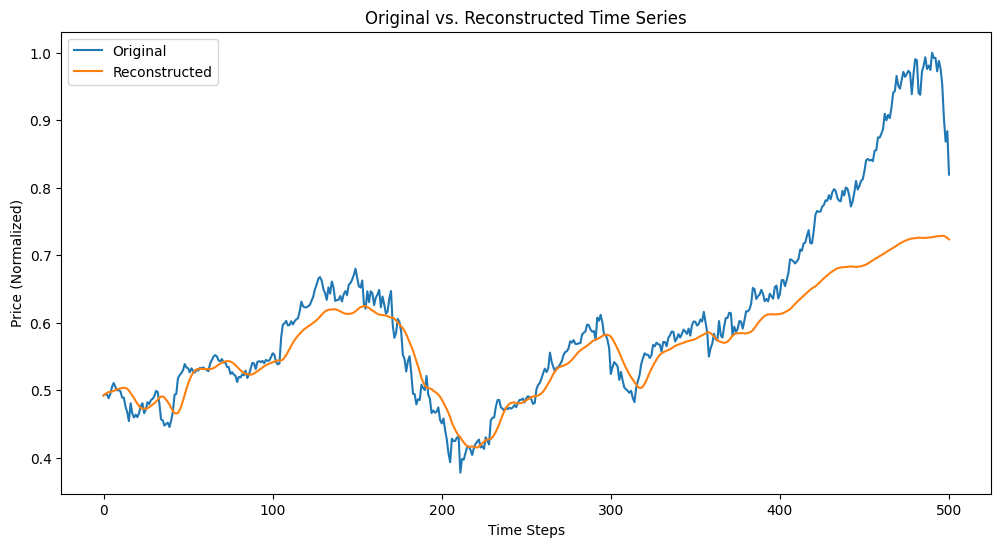

In [ ]:
predictions = autoencoder.predict(test_X)
# Plot original vs reconstructed sequences
plt.figure(figsize=(12, 6))
plt.plot(test_Y, label='Original')
plt.plot(predictions[:, -1, 0], label='Reconstructed')
plt.legend()
plt.title('Original vs. Reconstructed Time Series')
plt.xlabel('Time Steps')
plt.ylabel('Price (Normalized)')
plt.show()

In [ ]:
# Calculate the reconstruction loss using MSE.
reconstruction_loss = autoencoder.evaluate(test_X, test_X)
print("Reconstruction Loss (MSE):", reconstruction_loss)

16/16 [==============================] - 0s 8ms/step - loss: 0.0056
Reconstruction Loss (MSE): 0.005588961765170097


16/16 [==============================] - 0s 5ms/step


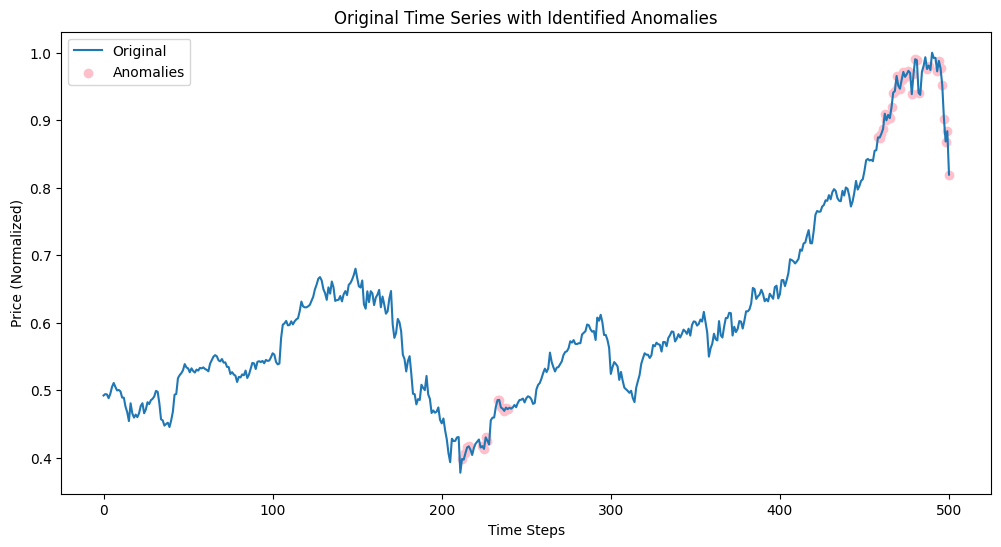

In [ ]:
# Use the encoder’s latent representations for downstream tasks, like anomaly identification
latent_representations = encoder.predict(test_X)

# Train an Isolation Forest on the latent representations
model = IsolationForest(contamination=0.1)  # Adjust contamination as needed
model.fit(latent_representations)

# Get anomaly scores
anomaly_scores = model.decision_function(latent_representations)

# Identify anomalies (based on a threshold)
anomalies = anomaly_scores < 0

# Analyze the anomalies
plt.figure(figsize=(12, 6))
plt.plot(test_Y, label='Original')
plt.scatter(np.arange(len(test_Y))[anomalies], test_Y[anomalies], color='pink', label='Anomalies')
plt.legend()
plt.title('Original Time Series with Identified Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price (Normalized)')
plt.show()

**Key Questions:**
1. How well does the LSTM autoencoder reconstruct the sequences?
- It is able to reconstruct it to some extent in the begining, but when the price increases suddenly, it is not able to recontruct it perfectly.
2. How does the choice of latent space dimensionality affect reconstruction quality and compression?
- Smaller Latent Space: Leads to higher compression but may reduce reconstruction quality as the model has to discard information, resulting in poorer reconstructions if the space is too small.
- Larger Latent Space: Improves reconstruction quality by preserving more information but reduces compression efficiency, as the model needs more parameters to encode the data.

- Thus, a balance is needed: a smaller latent space achieves better compression but risks losing important details, while a larger latent space improves reconstruction quality but at the cost of compression.

##Part 3: Comparison and Discussion


- Compare the performance of CNN and LSTM autoencoders:
1. Discuss their efficiency in feature extraction for spatial vs. sequential
data.
2. Analyze the quality of dimensionality reduction for both models.
3. Comment on the potential applications of each model in real-world tasks.


1. Efficiency in Feature Extraction:

- CNN Autoencoders: CNNs excel at feature extraction for spatial data like images. They leverage convolutional filters to learn hierarchical features capturing local patterns and spatial relationships within the data. This makes them effective in representing image structures and identifying objects or edges.

- LSTM Autoencoders: LSTMs are specialized for sequential data such as
time series or text. Their recurrent nature allows them to model temporal dependencies and learn long-range relationships within the sequence. They are well-suited for tasks like anomaly detection, prediction, and understanding the evolution of data over time.


2. Dimensionality Reduction:

- CNN Autoencoders: CNN autoencoders can effectively reduce the dimensionality of image data while retaining essential spatial information. The encoder part of the model learns a compressed representation of the image, capturing the most important features.

- LSTM Autoencoders: LSTM autoencoders compress sequential data by capturing the temporal dependencies. The encoder learns a  lower-dimensional representation that represents the essential characteristics of the sequence, allowing for dimensionality reduction while preserving temporal patterns.


3. Potential Applications:

- CNN Autoencoders:
    - Image denoising and inpainting
    - Image compression
    - Anomaly detection in images (e.g., identifying defects in manufacturing)
    - Feature extraction for image classification and object detection

- LSTM Autoencoders:
    - Anomaly detection in time series data (e.g., network traffic, financial data)
    - Time series forecasting
    - Natural language processing (e.g., text summarization, machine translation)
    - Generating synthetic sequences for data augmentation



**In Summary:**

- CNN autoencoders are particularly well-suited for tasks involving spatial data, especially images, where capturing local patterns and spatial relationships is crucial.
- LSTM autoencoders excel in handling sequential data, learning temporal
dependencies, and are powerful tools for tasks like anomaly detection and forecasting in time series.

Choosing between the two models depends on the nature of the data and the specific task at hand. If your data has a spatial structure, a CNN autoencoder is likely the better choice. If your data is sequential, an LSTM autoencoder may be more appropriate.